In [210]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

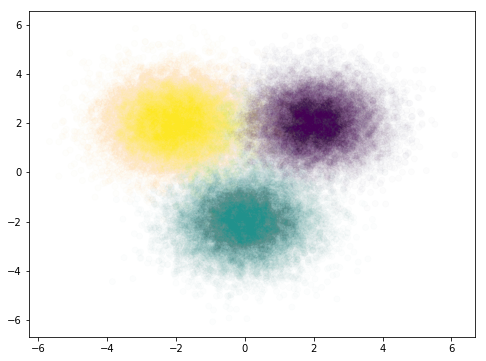

In [211]:
D = 2
K = 3
N = int (K*1.5e4)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])

X = np.vstack((X0,X1,X2))
y = np.array([0]* (N//K) + [1]*(N//K) + [2]* (N//K))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.01)

In [212]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i,y[i]] = 1
        
    return Y

def ReLU(H):
    return H*(H>0)

def softMax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis =1, keepdims = True)

def feed_forward(X,W1,b1,W2,b2):
    Z1 = ReLU(np.matmul(X,W1)+b1)
    P = softMax(np.matmul(Z1,W2) + b2)
    
    return Z1,P

def cross_entropy (Y,P):
    return -np.sum(Y*np.log(P))

def accuracy(Y,P):
    return np.mean(Y.argmax(axis =1 ) == P.argmax(axis = 1))



In [213]:
Y = one_hot_encode(y)

In [214]:
M = 4

W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

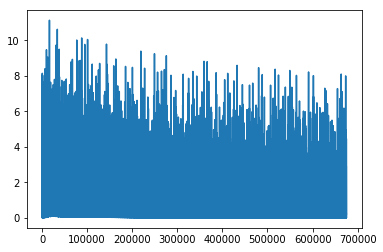

In [215]:
J = []

eta = 1e-8

epochs= 10

for epoch in range (epochs):
    
    s = np.arange(X.shape[0])
    np.random.shuffle(s)
    
    X = X[s]
    Y = Y[s]
    
    for i in range (N):
        
        X_i = X[[i],:]
        Y_i = Y[[i],:]
    
        Z1_i,P_i= feed_forward(X_i,W1,b1,W2,b2)
    
        J.append(cross_entropy(Y_i,P_i))
    
        dH2 = P_i - Y_i
        dW2 = np.matmul(Z1_i.T, dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
    
        dZ1 = np.matmul(dH2,W2.T)
        dH1 = dZ1*(Z1_i>0)
        dW1 = np.matmul(X_i.T,dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis=0)
    
    
plt.plot(J)

In [216]:
P= feed_forward(X,W1,b1,W2,b2)[-1]
accuracy(Y,P)

0.9476888888888889

Accuracy: 0.9715555555555555


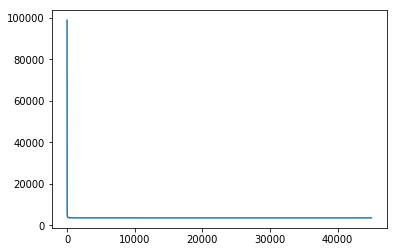

In [217]:
M = 4

W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

J = []
eta = 1e-5
epochs = int(4.5e4)


for epoch in range(epochs):
    Z1, P = feed_forward(X, W1, b1, W2, b2)
    J.append(cross_entropy(Y,P))
    
    dH2 = P - Y
    dW2 = np.matmul(Z1.T, dH2)
    W2 -= eta*dW2
    b2 -= eta*dH2.sum(axis = 0)
    
    dZ1 = np.matmul(dH2, W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T, dH1)
    W1 -= eta*dW1
    b1 -= eta*dH1.sum(axis = 0)

print("Accuracy: {}".format(accuracy(Y,P)))
plt.plot(J)